In [2]:
#%% Initialization code
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gauss_pdf(x,mu,sigma):
    return np.exp( -(x-mu)**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)

The Gaussian probability density function (pdf) is described as follows

$$
f(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\dfrac{(x-x_0)^2}{2\sigma^2}}
$$

We have used this function to generate two Gaussian distributions that could correspond to the distribution of neuronal firing rates when a stimulus has been presented and when no stimulus has been presented. Assuming both conditions have been presented equally, we can combine these distributions to generate the overall response distribution


In [3]:
# Distribution parameters
mu_1 = 5
sigma_1 = 0.5

mu_2 = 7
sigma_2 = 1

# Generate the distributions
x = np.arange(3,14,0.01)
r_smin = gauss_pdf(x,mu_1,sigma_1)
r_splus = gauss_pdf(x,mu_2,sigma_2)
r = 0.5*r_smin + 0.5*r_splus

And finally we plot the resulting distributions

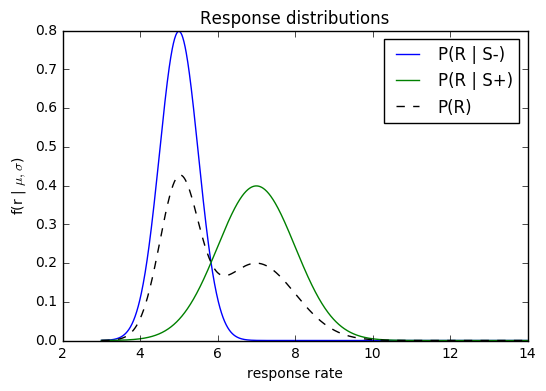

In [20]:
plt.plot(x,r_smin)
plt.plot(x,r_splus)
plt.plot(x,r,'--k')
plt.xlabel('response rate')
plt.ylabel('f(r | $\mu, \sigma$)')
plt.legend(['P(R | S-)','P(R | S+)','P(R)'])
plt.title('Response distributions')


These conditional distributions can now be used to look for a threshold response rate. If we only have knowledge of the response rate of this neuron, this threshold can be used to decide if a stimulus was presented to the neuron. The best candidate for this threshold is the first value of the response rate for which it is more likely that it has been produced come from the S+ conditional distribution. This can be obtained by calculating the likelihood ratio:

$$
LR = \dfrac{P(r | S+)}{P(r | S-)}
$$


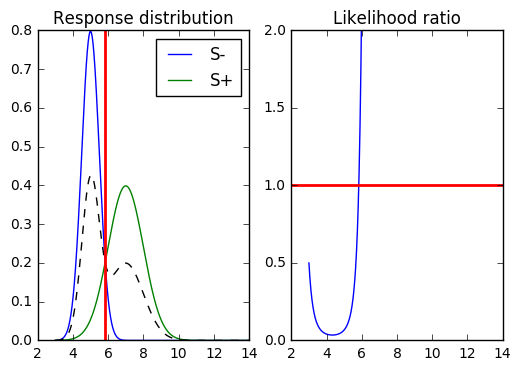

In [4]:
lr = r_splus/r_smin
lr_1 = np.argmax(lr >= 1)

plt.subplot(121)
plt.plot(x,r_smin)
plt.plot(x,r_splus)
plt.plot(x,r,'--k')
plt.axvline(x[lr_1],linewidth=2,color='r')
plt.legend(['S-','S+'])
plt.title('Response distribution')
plt.subplot(122)
plt.plot(x,lr)
plt.axhline(y=1,linewidth = 2, color='r')
plt.ylim(0,2)
plt.title('Likelihood ratio')



An interesting extension of this idea is that response distribution function might be sampled repeatedly to get a better estimate of the stimulus. For each neural response we calculate the likelihood ratio and integrate this values until some threshold is reached.

In the following code we simulate this process by repeatedly sampling from the response distribution. In the first case the samples come from a uniform distribution centered on the threshold value. The second and third case use samples that are biased towards S- and S+ respectively.


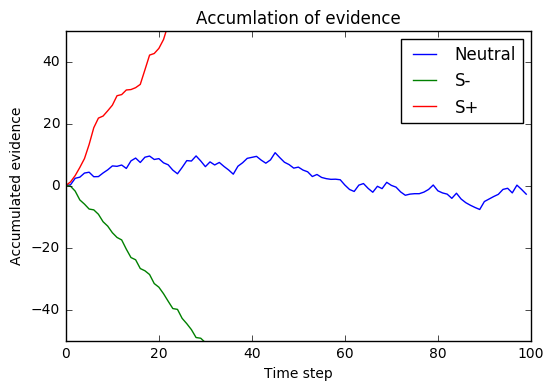

In [5]:
n_samples = 100
evidence = np.zeros((3,n_samples))

for i in range(1,n_samples):
    sample = np.random.randint(lr_1-50,lr_1+50) # CASE 1: threshold
    evidence[0,i] = evidence[0,i-1] + np.log(lr[sample])
    sample = np.random.randint(lr_1-100,lr_1)   # CASE 2: S- biased
    evidence[1,i] = evidence[1,i-1] + np.log(lr[sample])
    sample = np.random.randint(lr_1,lr_1+100)   # CASE 3: S+ biased
    evidence[2,i] = evidence[2,i-1] + np.log(lr[sample])
    
plt.plot(evidence.transpose())
plt.ylim(-50,50)
plt.title('Accumulation of evidence')
plt.xlabel('Time step')
plt.ylabel('Total accumulated evidence')
plt.legend(['Neutral','S-','S+'])